由于网上选取的彩色图片是三维的，所以需要通过PIL和cv2把图片转化为二维的（灰度）

In [1]:
from PIL import Image
import cv2
import numpy as np
imgarray = cv2.imread('./fengjing.bmp', 0) # 以灰度的方式读取图片
img = Image.fromarray(imgarray)


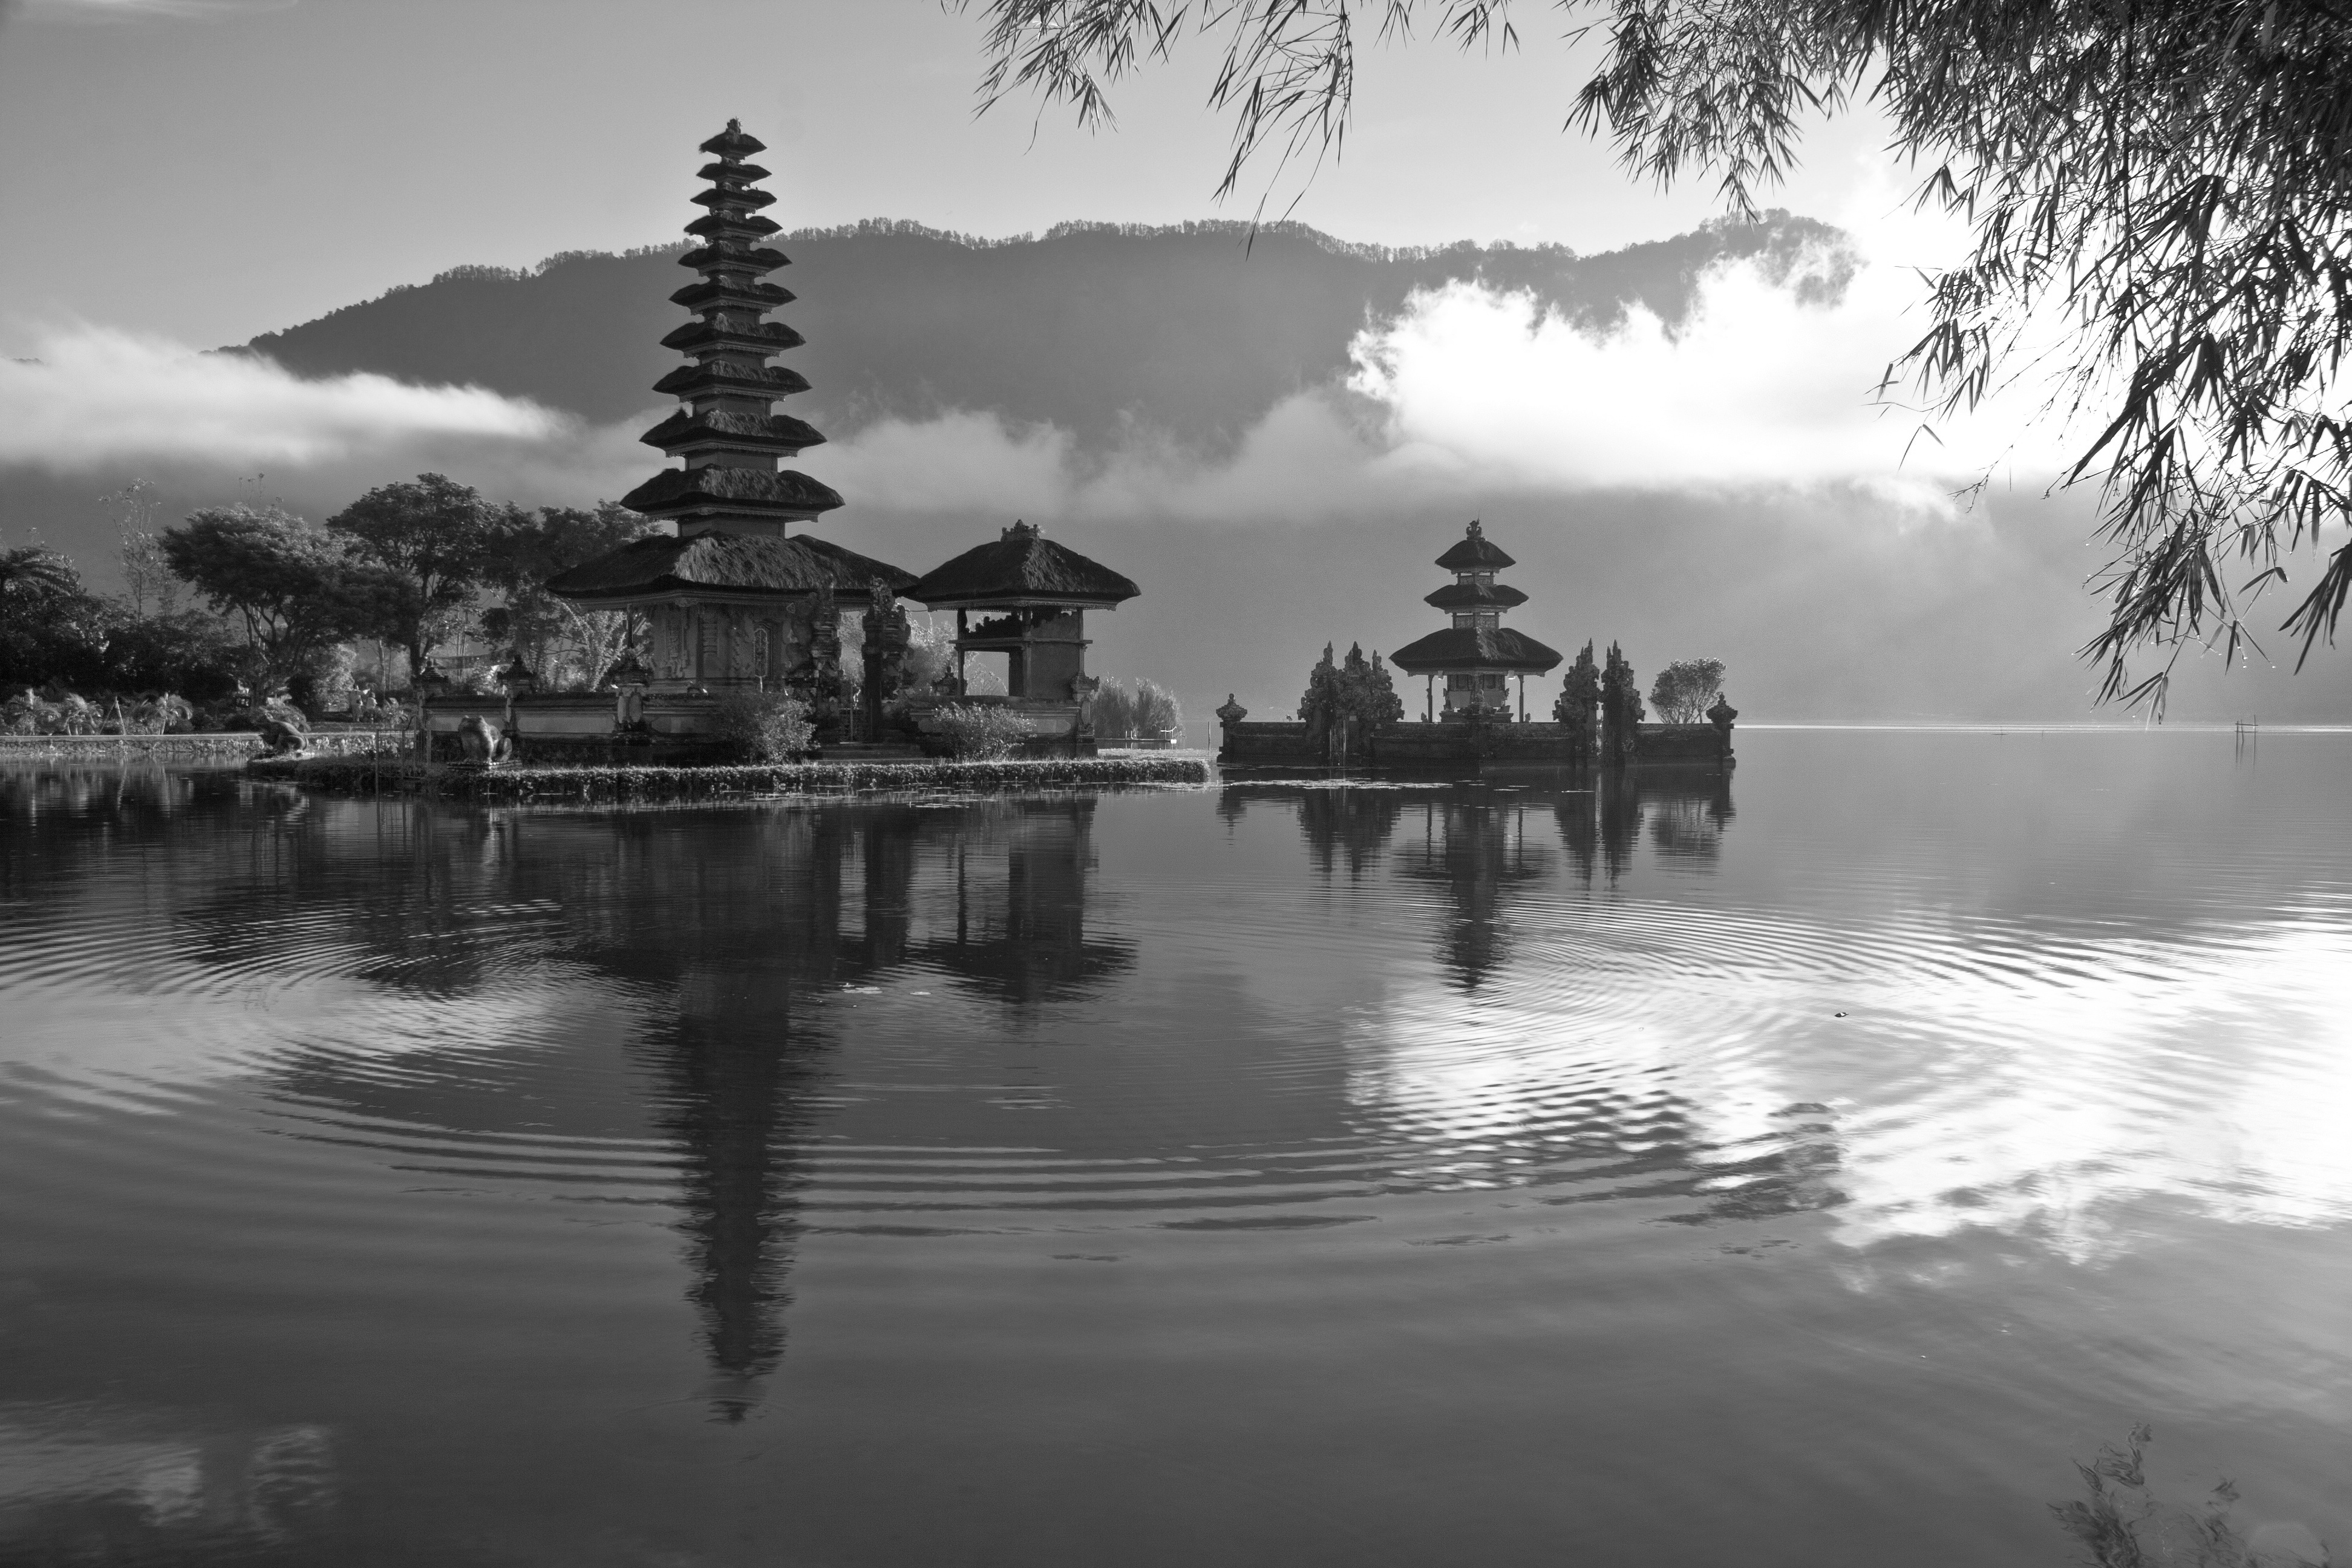

In [2]:
img

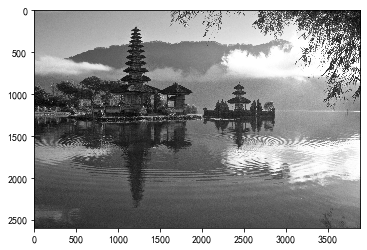

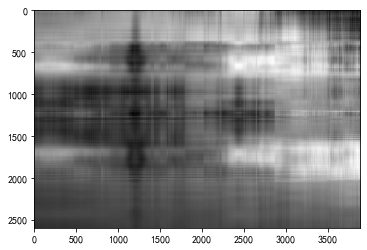

[[-17.65013582 -17.70764172 -20.17625182 ... -16.68486375 -20.60802134
  -10.90524873]
 [-22.06150185 -21.13556938 -22.59243666 ... -14.39346051 -18.32676957
  -18.67342959]
 [-22.61800267 -18.70159046 -18.15692516 ... -16.8834873  -24.82062753
  -16.20788911]
 ...
 [ -6.15642851  -4.14787314  -1.74649382 ...   5.92426285   6.96692254
    8.2667667 ]
 [ -0.11895273  -5.1112728   -2.7006615  ...   2.54970896   5.57200364
    5.8582746 ]
 [ -3.34064427  -8.33133779  -8.92441019 ...   6.35237215   7.38691346
    6.68334342]]


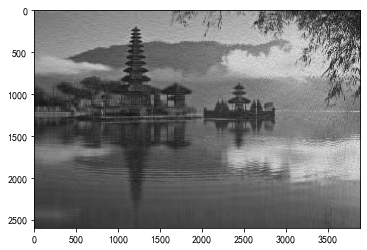

[[-12.82837746 -14.01799108 -16.09240212 ...   2.07293255 -12.11504971
  -14.85046269]
 [-14.69346748 -14.80219366 -15.87680081 ...   7.54745504  -7.05735519
  -20.70074722]
 [-11.449549    -8.5605076   -7.65476067 ...   7.94661929 -11.13098258
  -16.32504154]
 ...
 [ -5.7821991   -3.93777715  -1.29380475 ...   3.17341622   6.9802894
   10.57855612]
 [  0.81201704  -4.3510726   -1.71842493 ...   1.85483582   7.10163551
    8.9226731 ]
 [ -2.10516408  -7.21903346  -7.57772575 ...   6.08844089   9.25799491
    9.97821567]]


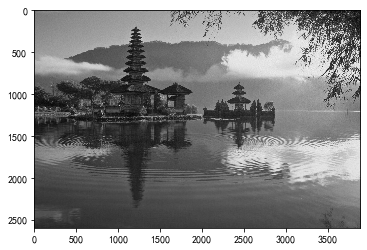

[[ 5.27760727  5.65381056  1.6112535  ... -1.05096258 -2.9903009
   0.16368907]
 [-2.53742176 -2.07092202 -0.81713884 ...  4.70401055  2.6710734
  -9.7534683 ]
 [-1.74812111 -1.58032528  0.71058997 ...  3.31804874  2.74846262
   1.85211092]
 ...
 [-5.55164416 -2.79450482  2.19294151 ... -0.75229761  2.94183917
   2.30401998]
 [-0.23334871 -3.58138462  0.01881532 ... -4.24690964  0.86704836
   1.71191738]
 [-1.5922713  -6.37119235 -3.41661761 ... -0.07096011  1.02039302
   0.485952  ]]


In [4]:
import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
	# 对于S，只保留前K个特征值
	s_temp = np.zeros(s.shape[0])
	s_temp[0:k] = s[0:k]
	s = s_temp * np.identity(s.shape[0])
	# 用新的s_temp，以及p,q重构A
	temp = np.dot(p,s)
	temp = np.dot(temp,q)
	plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
	plt.show()
	print(A-temp)


# 加载256色图片
# image = Image.open('./256.bmp') 
# image = Image.open('./fengjing.bmp')
A = np.array(img)
# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()
# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)
# 取前k个特征，对图像进行还原
get_image_feature(s, 5)
get_image_feature(s, 50)
get_image_feature(s, 500)